In [1]:
#Boiler plate imports
import pandas as pd
import sys
from time import time
import matplotlib.pyplot as plt

#SBND imports
s0 = time()
sys.path.append('/sbnd/app/users/brindenc/mysbnana_v09_75_03/srcs/sbnana/sbnana/SBNAna/pyana')
from sbnd.general import utils
from sbnd.cafclasses.slice import CAFSlice
from sbnd.cafclasses.pfp import PFP

#Constants
from sbnd.numu.numu_constants import *
from sbnd.prism import PRISM_BINS
from sbnd.constants import *

#Plotters
from sbnd.plotlibrary import makeplot
from sbnd.general import plotters

s1 = time()
print(f'SBND imports: {s1-s0:.2f} s')

%load_ext autoreload
%autoreload 2

SBND imports: 23.43 s


# 1. Load Data

In [2]:
#Constants/variables
#DATA_DIR  = '/exp/sbnd/data/users/brindenc/analyze_sbnd/numu/v09_78_04_wc_pandora'
DATA_DIR = '/exp/sbnd/data/users/brindenc/ML/test_fcl/debug_trackid/v4'
# FNAME = 'single_processed.df'
# HDR_FNAME = 'single.df'
#FNAME = 'all_processed.df'
#HDR_FNAME = 'all.df'
FNAME = 'test_processed.df'
HDR_FNAME = 'test.df'
NOM_POT = 0.6e20 # stats for first run
LABEL = 'SBND Work in Progress\n0.6e20 POT'
PLOT_DIR = f'Plots/reco_{plotters.day}'
SAVE_PLOT = False


In [3]:
#Get data and POT
pfp = PFP.load(f'{DATA_DIR}/{FNAME}','pfp'
               ,prism_bins=PRISM_BINS
               ,momentum_bins=MOMENTUM_BINS
               ,costheta_bins=COSTHETA_BINS
               ,pot=NOM_POT)
slc = CAFSlice.load(f'{DATA_DIR}/{FNAME}','slice'
                    ,prism_bins=PRISM_BINS
                    ,pot=NOM_POT)
hdr = pd.read_hdf(f'{DATA_DIR}/{HDR_FNAME}',key='hdr')
SAMPLE_POT = hdr.pot.sum()

#Scale to nominal POT
pfp.scale_to_pot(NOM_POT,SAMPLE_POT)
slc.scale_to_pot(NOM_POT,SAMPLE_POT)

--scaling to POT: 2.22e+14 -> 6.00e+19
--scaling to POT: 2.22e+14 -> 6.00e+19


## 2. Before Cuts

### 2.1 True event type distributions

In [4]:
#Get interaction types - won't work if there are no events of a given type
#slc_unk = CAFSlice(slc.data[slc.data.truth.event_type == -1])
slc_numucc = CAFSlice(slc.data[slc.data.truth.event_type == 0])
slc_nc = CAFSlice(slc.data[slc.data.truth.event_type == 1])
slc_nuecc = CAFSlice(slc.data[slc.data.truth.event_type == 2])
slc_cosmic = CAFSlice(slc.data[slc.data.truth.event_type == 3])
slc_dirt = CAFSlice(slc.data[slc.data.truth.event_type == 4])
slcs = [slc_numucc,slc_nc,slc_nuecc,slc_cosmic,slc_dirt]

#Get associated PFPs
#pfp_unk = pfp.get_reference_df(slc_unk)
pfp_numucc_df = pfp.get_reference_df(slc_numucc)
pfp_nc_df = pfp.get_reference_df(slc_nc)
pfp_nuecc_df = pfp.get_reference_df(slc_nuecc)
pfp_cosmic_df = pfp.get_reference_df(slc_cosmic)
pfp_dirt_df = pfp.get_reference_df(slc_dirt)

pfp_dfs = [pfp_numucc_df,pfp_nc_df,pfp_nuecc_df,pfp_cosmic_df,pfp_dirt_df]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
#Get label info
labels = []
names = []
colors = []

for key,item in EVENT_TYPE_LIST.items():
    if key == -1: #no unknown for now
        continue
    labels.append(item[0])
    names.append(item[1])
    colors.append(item[2])

weights = [s.data.genweight for s in slcs]

NameError: name 'slcs' is not defined

In [6]:
#Pandora score hist
scores = [s.data.nu_score for s in slcs]
bins = np.arange(0,1.05,0.05)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(scores,labels,xlabel=r'Pandora $\nu$-score',colors=colors,weights=weights
                    ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('nu_score_precut',fig=fig,folder_name=plot_dir)
        plt.close()
        

NameError: name 'slcs' is not defined

In [60]:
#Flash matching score hist
scores = [s.data.fmatch.score for s in slcs]
bins = np.arange(0,50,2)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(scores,labels,xlabel=r'Flash matching score',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('fmatch_score_precut',fig=fig,folder_name=plot_dir)
        plt.close()

In [61]:
#Number of particles
npfps = [s.data.npfp for s in slcs]
ntrks = [s.data.ntrk for s in slcs]
nshws = [s.data.nshw for s in slcs]
tnpfps = [s.data.truth.npfp for s in slcs]
tntrks = [s.data.truth.ntrk for s in slcs]
tnshws = [s.data.truth.nshw for s in slcs]
bins = np.arange(0,10,1)
for dens in [True,False]:
    #PFP
    fig,ax = makeplot.plot_hist(npfps,labels,xlabel=r'Number of PFPs',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('npfp_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    #Trks
    fig,ax = makeplot.plot_hist(ntrks,labels,xlabel=r'Number of tracks',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('ntrk_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    #Shws
    fig,ax = makeplot.plot_hist(nshws,labels,xlabel=r'Number of showers',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('nshw_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    #Truth PFP
    fig,ax = makeplot.plot_hist(tnpfps,labels,xlabel=r'Number of truth PFPs',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('tnpfp_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    #Truth Trks
    fig,ax = makeplot.plot_hist(tntrks,labels,xlabel=r'Number of truth tracks',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('tntrk_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    #Truth Shws
    fig,ax = makeplot.plot_hist(tnshws,labels,xlabel=r'Number of truth showers',colors=colors,weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('tnshw_precut',fig=fig,folder_name=plot_dir)
        plt.close()
    

#### 2.1.1 Cut distributions

In [62]:
pur,eff,f1 = slc.get_pur_eff_f1(['cosmic','fv','trk','has_muon'])
pur,eff,f1

(array([0.21441237, 0.50252181, 0.68067441, 0.63961764, 0.58362761]),
 array([0.        , 0.87595162, 0.7239054 , 0.29348456, 0.03512772]),
 array([1.        , 0.63865546, 0.70162461, 0.40235229, 0.06626693]))

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


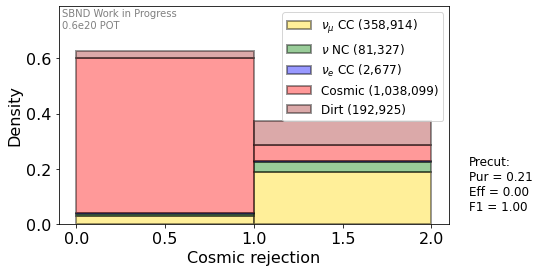

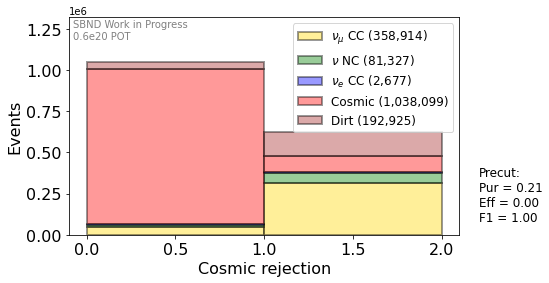

In [63]:
#Cosmic rejection
cosmic_rejection = [s.data.cut.cosmic for s in slcs]
#[s.data.cut.total]
#weights = [s.data[s.data.cut.total].genweight for s in slcs]
cut_desc = 'Precut:' + '\n' + f'Pur = {pur[0]:.2f}' + '\n' + f'Eff = {eff[0]:.2f}' + '\n' + f'F1 = {f1[0]:.2f}'
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(cosmic_rejection,labels,xlabel=r'Cosmic rejection',colors=colors,weights=weights,edgecolor='k'
                                ,histtype='barstacked',lw=2,bins=[0,1,2],density=dens,alpha=0.4)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    ax.set_ylim(None,ax.get_ylim()[1]*1.2) #small padding on top
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.add_label(ax,cut_desc,where='bottomrightoutside',color='black',fontsize=12)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        #plotters.save_plot('cosmic_rejection_precut',fig=fig,folder_name=plot_dir)
        #plt.close()

In [64]:
#FV
fv = [s.data.cut.fv for s in slcs]
cut_desc = 'Precut:' + '\n' + f'Pur = {pur[0]:.2f}' + '\n' + f'Eff = {eff[0]:.2f}' + '\n' + f'F1 = {f1[0]:.2f}'
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(fv,labels,xlabel=r'FV',colors=colors,weights=weights,edgecolor='k'
                                ,histtype='barstacked',lw=2,bins=[0,1,2],density=dens,alpha=0.4)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    ax.set_ylim(None,ax.get_ylim()[1]*1.2) #small padding on top
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.add_label(ax,cut_desc,where='bottomrightoutside',color='black',fontsize=12)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('fv_precut',fig=fig,folder_name=plot_dir)
        plt.close()

### 2.2 Single Particle

In [65]:
#Reco particles and slices
muon,proton,pion = pfp.get_particles([13,2212,211],use_reco=True)
pfps = [muon,proton,pion]
slc_muon = CAFSlice(muon.get_reference_df(slc))
slc_proton = CAFSlice(proton.get_reference_df(slc))
slc_pion = CAFSlice(pion.get_reference_df(slc))
slcs = [slc_muon,slc_proton,slc_pion]

#True particles and slices
tmuon,tproton,tpion = pfp.get_particles([13,2212,211],use_reco=False)
tpfps = [tmuon,tproton,tpion]
slc_tmuon = CAFSlice(tmuon.get_reference_df(slc))
slc_tproton = CAFSlice(tproton.get_reference_df(slc))
slc_tpion = CAFSlice(tpion.get_reference_df(slc))
tslcs = [slc_tmuon,slc_tproton,slc_tpion]

In [66]:
labels = [r'$\mu$',r'$p$',r'$\pi^\pm$']
names = ['muon','proton','pion']
weights = [p.data.genweight for p in tpfps]

In [67]:
#Chi2 muon
x2_mu = [p.data.trk.chi2pid.I2.chi2_muon for p in tpfps]
bins = np.arange(0,70,2)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(x2_mu,labels,xlabel=r'$\chi^2_{\mu}$',weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('x2_mu_precut',fig=fig,folder_name=plot_dir)
        plt.close()

In [68]:
#Chi2 proton
x2_p = [p.data.trk.chi2pid.I2.chi2_proton for p in tpfps]
bins = np.arange(0,250,5)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(x2_p,labels,xlabel=r'$\chi^2_{p}$',weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('x2_p_precut',fig=fig,folder_name=plot_dir)
        plt.close()

In [69]:
#Chi2 pion
x2_pi = [p.data.trk.chi2pid.I2.chi2_pion for p in tpfps]
bins = np.arange(0,80,2)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(x2_pi,labels,xlabel=r'$\chi^2_{\pi}$',weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'
        plotters.save_plot('x2_pion_precut',fig=fig,folder_name=plot_dir)
        plt.close()

In [70]:
#Particle momentum
momenta = [p.data.trk.bestmom for p in tpfps]
bins = np.arange(0,2.5,0.1)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(momenta,labels,xlabel=r'Reco Momentum [GeV]',weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='centerright',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'    
        plotters.save_plot('particle_momentum_precut',fig=fig,folder_name=plot_dir)
        plt.close()

In [71]:
#Particle direction cos theta
costhetas = [np.cos(p.data.trk.theta) for p in tpfps]
bins = np.arange(-1,1.1,0.1)
for dens in [True,False]:
    fig,ax = makeplot.plot_hist(costhetas,labels,xlabel=r'Reco cos($\theta$)',weights=weights
                                ,histtype='step',lw=2,bins=bins,density=dens)
    ax.set_xlim(-1,1)
    if dens: ax.set_ylabel('Density')
    else: ax.set_ylabel('Events')
    plotters.add_label(ax,LABEL,where='topleft',color='gray',fontsize=10)
    plotters.set_style(ax)
    if SAVE_PLOT:
        if dens: plot_dir = f'{PLOT_DIR}/dens'
        else: plot_dir = f'{PLOT_DIR}/counts'    
        plotters.save_plot('particle_costheta_precut',fig=fig,folder_name=plot_dir)
        plt.close()